In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
from PIL import Image
import re


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
PATH = "/content/drive/MyDrive/EE626_Project/Detection_model/detection_faster_rcnn.pth"
model = torch.load(PATH)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
import cv2
def detect_text(image_loc,threshold):
  pic = cv2.imread(image_location,1)
  pic = pic/255.0
  pic = pic.transpose((2,0,1))
  print(pic.shape)
  pict = torch.from_numpy(pic).float()
  with torch.no_grad():
      prediction = model([pict.to(device)])
  pred_score = list(prediction[0]['scores'].detach().cpu().numpy())
  prediction_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  box = prediction[0]["boxes"]
  pred_labels = prediction[0]["labels"]
  pred_labels_f = pred_labels[:prediction_t+1]
  box_f=box[:prediction_t+1]
  rect = box_f.cpu().numpy()
  pred_labels_f = pred_labels_f.cpu().numpy()
  return rect, pred_labels_f

# post processing : displaying cropped text detected in an image using bounding boxes predicted.
def display_output(image_loc, rect, pred_labels): 
  pic = cv2.imread(image_loc,1)
  i=0
  for ip in rect:
    ip = np.int64(ip)
    print(i+1)
    if (pred_labels[i] ==1):
      print("Hindi")
    elif (pred_labels[i] ==2):
      print("English")
    elif (pred_labels[i] ==3):
      print("Other")
    i=i+1
    # print(int(ip[1]))
    im = pic[ip[1]:ip[3],ip[0]:ip[2]]
    plt.imshow(im)
    plt.show()

(3, 497, 1000)
1
Hindi


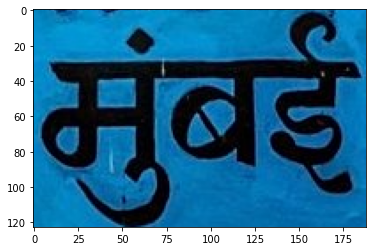

2
Hindi


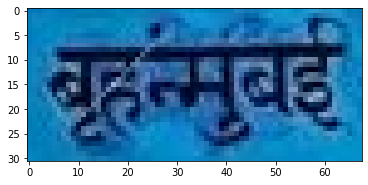

3
Hindi


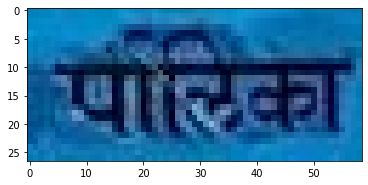

4
Hindi


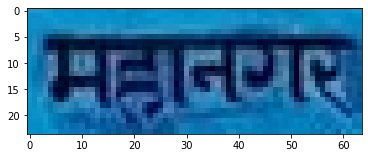

In [ ]:
image_location = "/content/drive/MyDrive/EE626_Project/test_images/4.jpg"
threshold = 0.7
rect, pred_labels = detect_text(image_location,threshold)
display_output(image_location, rect, pred_labels)

(3, 189, 266)
1
Hindi


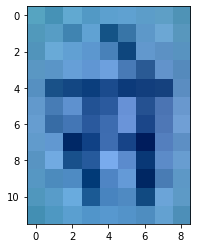

2
Hindi


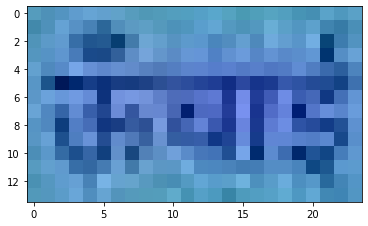

3
Hindi


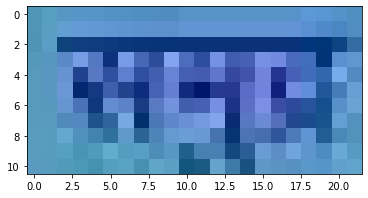

4
Hindi


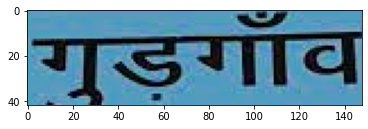

5
English


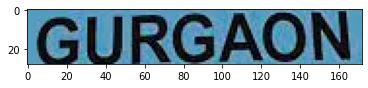

6
Hindi


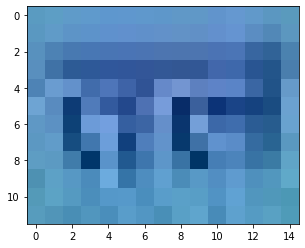

7
English


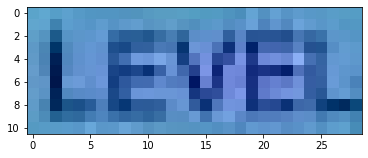

8
Hindi


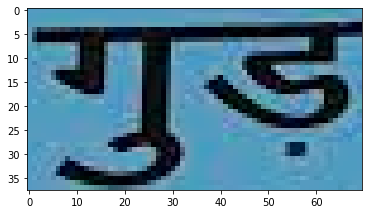

9
English


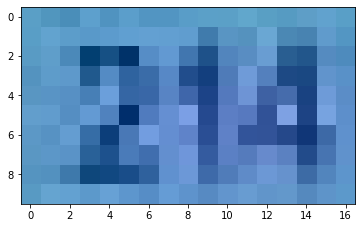

10
English


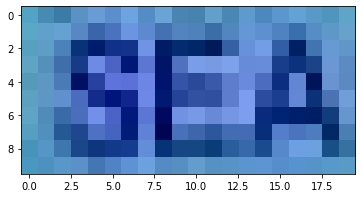

11
English


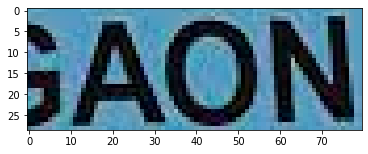

12
English


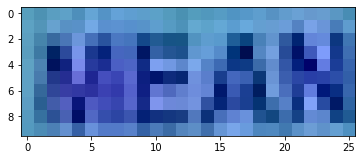

In [ ]:
image_location = "/content/drive/MyDrive/EE626_Project/test_images/4.jpeg"
threshold = 0.7
rect, pred_labels = detect_text(image_location,threshold)
display_output(image_location, rect, pred_labels)

(3, 500, 500)
1
English


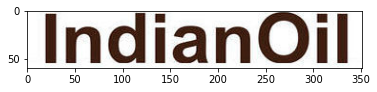

2
Hindi


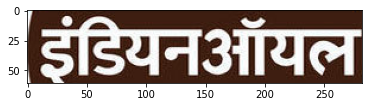

In [ ]:
image_location = "/content/drive/MyDrive/EE626_Project/test_images/2.jpg"
threshold = 0.7
rect, pred_labels = detect_text(image_location,threshold)
display_output(image_location, rect, pred_labels)